In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [4]:
ls -la

total 17
drwx------ 2 root root 4096 Feb 13 13:22 data/
-rw------- 1 root root 2165 Feb 13 17:50 Day4_model.ipynb
drwx------ 2 root root 4096 Feb 11 09:53 .git/
-rw------- 1 root root    5 Feb 13 13:22 .gitignore
-rw------- 1 root root  799 Feb 11 09:50 HelloGithub.ipynb
drwx------ 2 root root 4096 Feb 12 08:45 matrix_one/
-rw------- 1 root root   40 Feb 11 09:53 README.md


In [5]:
ls data

men_shoes.csv


In [0]:
df=pd.read_csv("data/men_shoes.csv",low_memory=False)

In [7]:
df.shape

(18280, 48)

In [8]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price=np.mean(df['prices_amountmin'])

In [10]:
mean_price

93.53952188183217

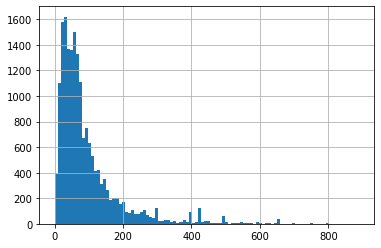

In [11]:
df['prices_amountmin'].hist(bins=100)

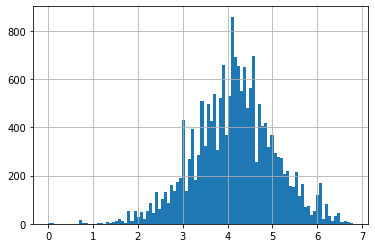

In [12]:
np.log(df['prices_amountmin']+1).hist(bins=100)

In [14]:
df['brand'].

AttributeError: ignored

In [44]:
df['brand'].value_counts()

Nike            1709
PUMA             574
Ralph Lauren     524
New Balance      361
VANS             356
                ... 
Neil M             1
Shock Doctor       1
Designer           1
Tallia             1
Ewing              1
Name: brand, Length: 1856, dtype: int64

In [45]:
df['categories'].value_counts()

All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                                 3698
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                                                 1632
Men's Casual Shoes,Shoes,Men's Shoes,Clothing                                                                                               698
All Men's Clothing,Men's Clothing,Men's Outerwear,Clothing, Shoes & Jewelry,Clothing                                                        586
Clothing, Shoes & Accessories,Men's Shoes,Athletic                                                                                          391
                                                                                                                                           ... 
Men,Shoes,Loafers & Slip-Ons,Loafer                                                                                                     

In [0]:
df['brand_cat']=df['brand'].factorize()[0]
df['categories_cat']=df['categories'].factorize()[0]

In [50]:
df['brand_cat'].value_counts()

20      1709
8        574
188      524
45       361
89       356
        ... 
1032       1
1699       1
1683       1
1064       1
1855       1
Name: brand_cat, Length: 1857, dtype: int64

In [55]:
df['categories_cat'].value_counts()

1       3698
0       1632
2        698
6        586
13       391
        ... 
695        1
759        1
775        1
807        1
1143       1
Name: categories_cat, Length: 1170, dtype: int64

In [76]:
features=['brand_cat']
X=df[features].values
y=df['prices_amountmin'].values
model=DecisionTreeRegressor(max_depth=10)
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
print('mean : ',np.mean(scores),' std : ',np.std(scores))

mean :  -52.69697893737165  std :  3.8042547455368454


In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
def make_model(features,depth=5):
  X=df[features].values
  y=df['prices_amountmin'].values
  model=DecisionTreeRegressor(max_depth=depth)
  scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
  return np.mean(scores),np.std(scores)

In [71]:
features=['brand_cat']
mean,std=make_model(features,10)
print('mean : ',mean,' std : ',std)

mean :  -52.69697893737165  std :  3.8042547455368454


In [72]:
features=['categories_cat']
mean,std=make_model(features,10)
print('mean : ',mean,' std : ',std)

mean :  -53.29976608296996  std :  2.1067258279975913


In [78]:
features=['brand_cat','categories_cat']
mean,std=make_model(features,10)
print('mean : ',mean,' std : ',std)

mean :  -51.00274857751327  std :  1.4275778902735792


In [0]:
!git status

In [0]:
!git config --global user.email "djkormo@gmail.com"
!git config --global user.name "KP"
!git add . *.ipynb
!git commit -m "Adding day4 notebooks"

In [0]:
!git push -u origin master